# Product Detection

In [1]:
import torch

/home/app/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Train Model
We will use comet as a visualizacion tool for our training experiments, we need to install comet_ml python library and create an account.

In [2]:
!python3 /home/app/src/yolov5/train.py --img 640 --batch 16 --epochs 5 --data /home/app/src/yolo_data.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/home/app/src/yolo_data.yaml, hyp=../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.10 torch-1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

# Product and missing Product Detection

In order to train a model able to detect products and missing products we have labelled missing products class for some images from our original dataset, for this we have use a freee inline tool called Roboflow, We are now goint to donwload the new dataset from our workspace.

In [3]:
!pip install -q roboflow
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="YOUR API KEY HERE")
project = rf.workspace("final-project-object-detection-for-instore-inventory-management").project("empty-spaces-in-a-supermarket-hanger-1upsp")
dataset = project.version(26).download("yolov5")

In [1]:
!mv /home/app/src/notebooks/Empty-spaces-in-a-supermarket-hanger-26 /home/app/src/data_missing

In [2]:
# train yolov5s on custom data for 10 epochs
!python3 /home/app/src/yolov5/train.py --epochs 10 --data /home/app/src/data_missing/data.yaml --cfg /home/app/src/yolov5/models/yolov5m.yaml --weights /home/app/src/yolov5/runs/train/exp/weights/best.pt --name yolov5s_results

train: weights=/home/app/src/yolov5/runs/train/exp/weights/best.pt, cfg=/home/app/src/yolov5/models/yolov5m.yaml, data=/home/app/src/data_missing/data.yaml, hyp=../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../yolov5/runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.10 torch-1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_b

In [3]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

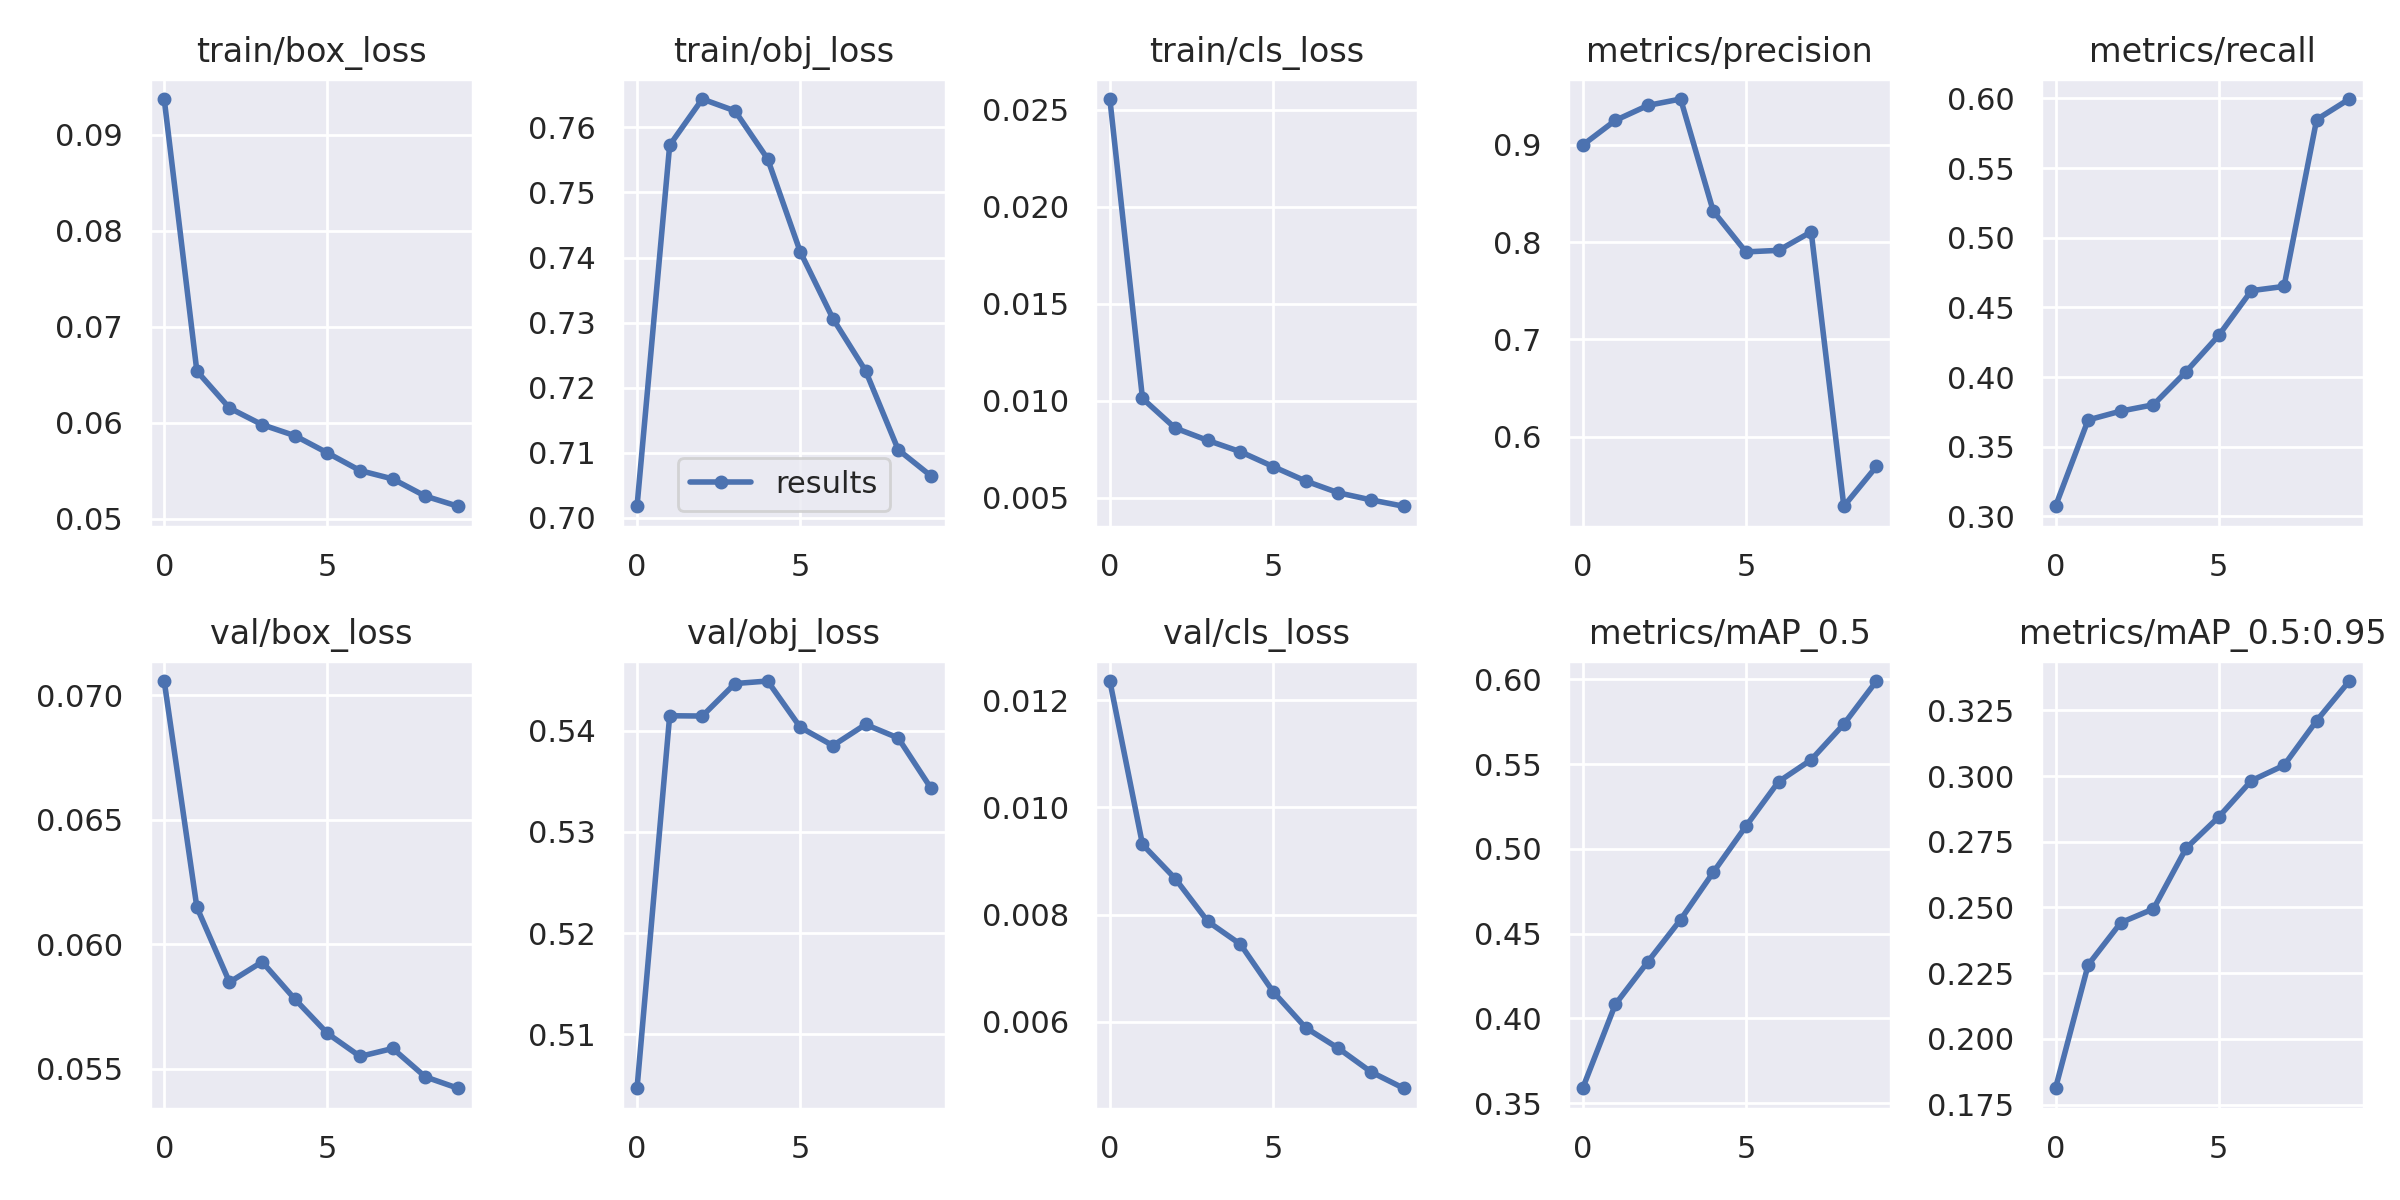

In [6]:
from IPython.display import Image
Image(filename='/home/app/src/yolov5/runs/train/yolov5s_results4/results.png', width=1000) 